#### **PACKAGES**

To install spaCy, follow the instructions in https://spacy.io/usage  
Operating System, Platform (**ARM/M1** if you have a Apple M1-M3 chip), Package manager, Hardware, Configurations (**virtual env**), Trained pipelines (**English**, **French**, **Spanish**), Select pipeline for (**accuracy**)

In [76]:
import os, sys, csv, time, re
import pandas as pd, numpy as np, matplotlib.pyplot as plt
import openpyxl
from pickle import load
from datetime import datetime
import spacy
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [2]:
print(sys.version)

3.11.11 (main, Dec 11 2024, 10:25:04) [Clang 14.0.6 ]


#### **QUICK SETUP**

In [2]:
pd.set_option('display.max_rows', None)

In [2]:
cty = "Uzbekistan" #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< change here!
lang = "English" #<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<< change here!

#### **DATA IMPORT**

In [3]:
#print(os.getcwd())
path = os.getcwd() + "/data/countries/" + cty.lower().replace(" ", "_")
print(path)

/Users/julienmhp/Desktop/undp/TargetAssessmentReport/data/countries/uzbekistan


In [4]:
file = [os.path.join(path, f) for f in os.listdir(path) if cty.lower().replace(" ", "_") in f and f.endswith(".xlsx")]
print(file[0])

/Users/julienmhp/Desktop/undp/TargetAssessmentReport/data/countries/uzbekistan/data_uzbekistan_22May25.xlsx


In [5]:
dta = pd.read_excel(file[0], sheet_name = "targets", engine = "openpyxl")

In [9]:
dta.head()

,Country,Target Text,Target Name,Document,Source,Convention,Doc,Type
0,Uzbekistan,By 2030 all areas of Uzbekistan are under a na...,CBD Target 1a,CBD Online Reporting Tool,https://ort.cbd.int/national-targets/analyzer?...,nature,CBDORT,National Biodiversity Targets
1,Uzbekistan,By 2030 all cities in Uzbekistan have “masterp...,CBD Target 1b,CBD Online Reporting Tool,https://ort.cbd.int/national-targets/analyzer?...,nature,CBDORT,National Biodiversity Targets
2,Uzbekistan,By 2030 undertake the ecological restoration o...,CBD Target 2,CBD Online Reporting Tool,https://ort.cbd.int/national-targets/analyzer?...,nature,CBDORT,National Biodiversity Targets
3,Uzbekistan,Undertake urgent management actions to conserv...,CBD Target 3,CBD Online Reporting Tool,https://ort.cbd.int/national-targets/analyzer?...,nature,CBDORT,National Biodiversity Targets
4,Uzbekistan,By 2030 at least 30 percent of Uzbekistan’s te...,CBD Target 4,CBD Online Reporting Tool,https://ort.cbd.int/national-targets/analyzer?...,nature,CBDORT,National Biodiversity Targets


In [10]:
dta.shape

(41, 8)

#### **MODEL**

The **spaCy** model for NLP - what to know
- **token** each work or symbol  
- **lemma** root of lowecase token
- **pos** part-of-speech
- **dependency** relations between tokens
- **entity** grammatical role played in phrase

In [10]:
# POS
print(nlp.get_pipe("tagger").labels)
# ADJ (adjective), ADP (adposition), ADV (adverb), AUX (auxiliary verb), CONJ (conjugation), CCONJ (coordinating conjugation), 
# DET (determiner), INTJ (interjection), NOUN, NUM, PART (particle), PRON (pronoun), PROPN (proper noun), PUNCT (punctuation), 
# SCONJ (subordinating conjugation), SYM (symbol), VERB , X (other/unknown), SPACE (white space)

('$', "''", ',', '-LRB-', '-RRB-', '.', ':', 'ADD', 'AFX', 'CC', 'CD', 'DT', 'EX', 'FW', 'HYPH', 'IN', 'JJ', 'JJR', 'JJS', 'LS', 'MD', 'NFP', 'NN', 'NNP', 'NNPS', 'NNS', 'PDT', 'POS', 'PRP', 'PRP$', 'RB', 'RBR', 'RBS', 'RP', 'SYM', 'TO', 'UH', 'VB', 'VBD', 'VBG', 'VBN', 'VBP', 'VBZ', 'WDT', 'WP', 'WP$', 'WRB', 'XX', '``')


In [12]:
# Dependencies
print(nlp.get_pipe("parser").labels)
# ROOT (root of sentence), bsubj (nominal subject), nsubjpass (passive nominal subject), 
# dobj (direct object), iobj (indirect object), attr (attribute), prep (preposition modifier), 
# pobj (object of a preposition), amod (adjectival modifier), advmod (adverbial modifier), 
# compound (compound noun modifier), aux (auxiliary verb), auxpass (passive auxliary), 
# det (determiner), conj (conjugation), cc (coordinating conjugation), mod (nominal modifier), 
# npadvmod (noun phrase as adverbial modifier), poss (possession modifier), 
# ccomp (clausal complement), xcomp (open clausal complement), mark (marker for subordinate clause)

('ROOT', 'acl', 'acomp', 'advcl', 'advmod', 'agent', 'amod', 'appos', 'attr', 'aux', 'auxpass', 'case', 'cc', 'ccomp', 'compound', 'conj', 'csubj', 'csubjpass', 'dative', 'dep', 'det', 'dobj', 'expl', 'intj', 'mark', 'meta', 'neg', 'nmod', 'npadvmod', 'nsubj', 'nsubjpass', 'nummod', 'oprd', 'parataxis', 'pcomp', 'pobj', 'poss', 'preconj', 'predet', 'prep', 'prt', 'punct', 'quantmod', 'relcl', 'xcomp')


In [13]:
# Entities
print(nlp.get_pipe("ner").labels)
# GPE (country, state, city, ...), 
# NORP (nationality, religious or political groups, ...), 
# FAC (buildings, airports, highways, ...), 
# LAW (doucments)

('CARDINAL', 'DATE', 'EVENT', 'FAC', 'GPE', 'LANGUAGE', 'LAW', 'LOC', 'MONEY', 'NORP', 'ORDINAL', 'ORG', 'PERCENT', 'PERSON', 'PRODUCT', 'QUANTITY', 'TIME', 'WORK_OF_ART')


In [7]:
if lang == "English":
    lang_cd = "en"
    media = "web"
    model = "core"
elif lang == "Spanish":
    lang_cd = "es"
    media = "news"
    model = "dep"
elif lang == "French":
    lang_cd = "fr"
    media = "news"
    model = "dep"

In [8]:
lang_cd+"_"+model+"_"+media+"_trf"

'en_core_web_trf'

In [9]:
nlp = spacy.load(lang_cd+"_"+model+"_"+media+"_trf")

In [11]:
corpus = list(nlp.pipe(dta["Target Text"]))

In [12]:
rows = []
for corpus, text in zip(corpus, dta["Target Name"]):
    for token in corpus:
        rows.append({
            "Target Name": text,
            "token": token.text,
            "lemma": token.lemma_,
            "pos": token.pos_,
            "dependency": token.dep_,
            "entity": token.ent_type_
        })

tokens_df = pd.DataFrame(rows)

### **Corrections**

In [13]:
# Uzbekistan:
tokens_df[tokens_df["Target Name"] == dta["Target Name"][4]] # 222 "I-IV 0 20%" [...]
#tokens_df[tokens_df["Target Name"] == dta["Target Name"][33]] # 1637 "Target 31" [√]

,Target Name,token,lemma,pos,dependency,entity
182,CBD Target 4,By,by,ADP,prep,
183,CBD Target 4,2030,2030,NUM,pobj,DATE
184,CBD Target 4,at,at,ADV,advmod,PERCENT
185,CBD Target 4,least,least,ADV,advmod,PERCENT
186,CBD Target 4,30,30,NUM,nummod,PERCENT
...,...,...,...,...,...,...
241,CBD Target 4,additional,additional,ADJ,amod,
242,CBD Target 4,10,10,NUM,nummod,PERCENT
243,CBD Target 4,%,%,NOUN,appos,PERCENT
244,CBD Target 4,),),PUNCT,punct,


In [14]:
# Ensures that the word "by", followed by a number representing a date also is considered as a date
tokens_df.loc[
    (tokens_df["lemma"] == "by") & 
    (tokens_df["pos"].shift(-1) == "NUM") & 
    (tokens_df["entity"].shift(-1) == "DATE"), 
    "entity"] = tokens_df["entity"].shift(-1)

# Ensures that numbers preceded by any terms such as "target" are not regarded as numbers
org = ["target", "targets", "goal", "goals", "objective", "objectives", "figure", "table", 
       "zone", "zones", "strategy", "strategies", "strategic", "plan", "plans", 
       "phase", "phases", "agenda", "agendas", "policy", "policies", "stage", "stages", 
       "programme", "programmes", "action", "actions", "budget"]
tokens_df.loc[
    (tokens_df["entity"] == "CARDINAL") & 
    (tokens_df["lemma"].shift(1).isin(org)), "entity"] = ""

# Ensures that "GPE", "ORG" and "LAW" are discarded as relevant to the analysis - not quant nor temporal
tokens_df.loc[
    (tokens_df["entity"] == "ORG") | (tokens_df["entity"] == "LAW") |  
    (tokens_df["entity"] == "GPE") | (tokens_df["entity"] == "LOC"), 
    "entity"] = ""

In [15]:
# Eliminates all tokens the "entity" parameter of which inexists
tokens_df = tokens_df.loc[(tokens_df["entity"] != "")]

In [16]:
# Lumps together into a single string consecutive tokens that come from the same entity parameter
tokens_df["flag"] = (
    (tokens_df["entity"] != tokens_df["entity"].shift()) |
    (tokens_df.index != tokens_df.index.to_series().shift() + 1))
tokens_df["entity_group"] = tokens_df["flag"].cumsum()
tokens_df.drop(columns="flag", inplace=True)

In [17]:
tokens_df["mergeable"] = (tokens_df["entity"] != "") & (tokens_df["entity"] != "O")
tokens_df["merge_group"] = tokens_df["entity_group"].where(tokens_df["mergeable"])

In [18]:
merged = (
    tokens_df.groupby(["Target Name", "merge_group", "entity"], dropna=True)
    .agg({"token": " ".join})
    .reset_index()
)
merged = merged.drop(["merge_group"], axis = 1)

In [19]:
# ensures there are no spaces between a number and "%"
merged["token"] = merged["token"].str.replace(r"(\d+)\s+%", r"\1%", regex=True)

In [20]:
merged

,Target Name,entity,token
0,BTR1 Target 3,QUANTITY,at least 7 billion m3
1,BTR1 Target 7,QUANTITY,2 million hectares
2,CBD Target 10,DATE,By 2030
3,CBD Target 12,DATE,By 2030
4,CBD Target 13,DATE,By 2030
5,CBD Target 15,DATE,By 2030
6,CBD Target 16,DATE,2030
7,CBD Target 17,DATE,By 2030
8,CBD Target 18a,DATE,By 2026
9,CBD Target 18b,DATE,By 2030


In [20]:
# Creates a list of time-bound terms per target
dates = (
    merged[merged["entity"] == "DATE"]
    .groupby("Target Name")["token"]
    .apply(lambda x: "; ".join(x))
    .reset_index(name="dates")
)

In [21]:
# Creates a list of quantitative terms per target
quants = (
    merged[merged["entity"] != "DATE"]
    .groupby("Target Name")["token"]
    .apply(lambda x: "; ".join(x))
    .reset_index(name="quants")
)

In [23]:
quants

,Target Name,quants
0,BTR1 Target 3,at least 7 billion m3
1,BTR1 Target 7,2 million hectares
2,CBD Target 19b,at least 15%
3,CBD Target 1b,30%
4,CBD Target 2,at least 30%
5,CBD Target 23,three
6,CBD Target 4,at least 30 percent; 0 20%; 10%
7,CBD Target 6,at least 50%
8,NDC2 Target 1,25%


In [22]:
condens = pd.merge(dates, quants, on="Target Name", how="outer")

In [23]:
condens[["dates", "quants"]] = condens[["dates", "quants"]].fillna("")

In [27]:
condens

,Target Name,dates,quants
0,BTR1 Target 3,,at least 7 billion m3
1,BTR1 Target 7,,2 million hectares
2,CBD Target 10,By 2030,
3,CBD Target 12,By 2030,
4,CBD Target 13,By 2030,
5,CBD Target 15,By 2030,
6,CBD Target 16,2030,
7,CBD Target 17,By 2030,
8,CBD Target 18a,By 2026,
9,CBD Target 18b,By 2030,


### **Visuals**

#### **Nature**

In [24]:
t_nat = ["CBD"]
p_nat = "|".join(t_nat)
nat = condens[condens["Target Name"].str.contains(p_nat, case = False, na = False)]

In [45]:
nat

,Target Name,dates,quants
2,CBD Target 10,By 2030,
3,CBD Target 12,By 2030,
4,CBD Target 13,By 2030,
5,CBD Target 15,By 2030,
6,CBD Target 16,2030,
7,CBD Target 17,By 2030,
8,CBD Target 18a,By 2026,
9,CBD Target 18b,By 2030,
10,CBD Target 18c,By 2030,
11,CBD Target 19a,By 2026,


In [71]:
nat_qt = nat[nat['quants'] != ""]['quants'].str.split(';').explode('quants').str.lower().reset_index(drop=True)
nat_tt = nat[nat['dates'] != ""]['dates'].str.split(';').explode('dates').str.lower().reset_index(drop=True)

In [72]:
nat_qt

0           at least 15%
1                    30%
2           at least 30%
3                  three
4    at least 30 percent
5                  0 20%
6                    10%
7           at least 50%
Name: quants, dtype: object

In [69]:
nat_tt

0     by 2030
1     by 2030
2     by 2030
3     by 2030
4        2030
5     by 2030
6     by 2026
7     by 2030
8     by 2030
9     by 2026
10    by 2030
11    by 2030
12    by 2030
13    by 2030
14    by 2030
15    by 2030
16    by 2030
17    by 2030
18    by 2030
19    by 2030
20    by 2030
21    by 2030
22    by 2030
Name: dates, dtype: object

In [78]:
wdc1 = Counter(nat_qt)
print(wdc1)

Counter({'at least 15%': 1, '30%': 1, 'at least 30%': 1, 'three': 1, 'at least 30 percent': 1, ' 0 20%': 1, ' 10%': 1, 'at least 50%': 1})


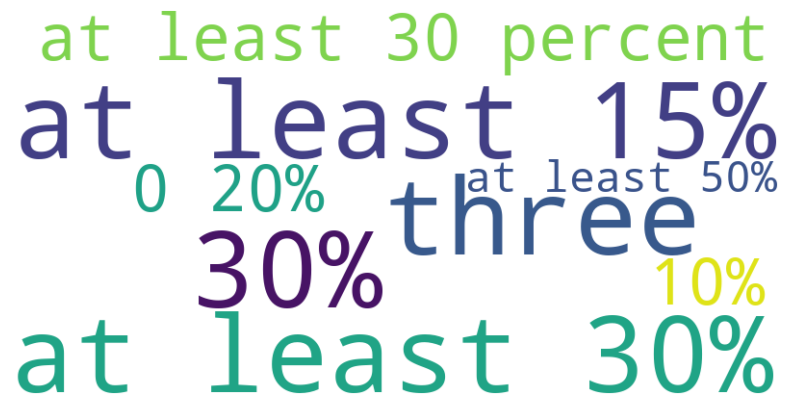

In [97]:
wordcloud = WordCloud(width = 800, height = 400, 
                      background_color = "white", 
                      #regexp = r'[\w%]+'
                     #).generate(wdc1)
                     ).generate_from_frequencies(wdc1)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [82]:
wdc2 = Counter(nat_tt)
print(wdc2)

Counter({'by 2030': 20, 'by 2026': 2, '2030': 1})


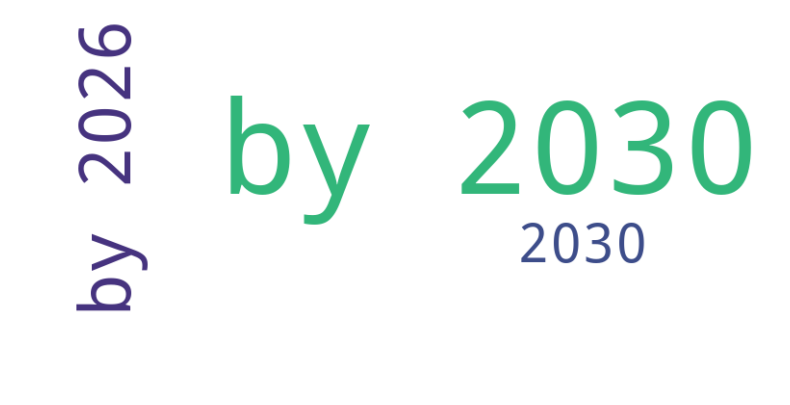

In [96]:
wordcloud = WordCloud(width = 800, height = 400, 
                      background_color = "white", 
                      #regexp = r'[\w%]+'
                     #).generate(wdc1)
                     ).generate_from_frequencies(wdc2)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### **Climate**

In [36]:
t_cli = ["NDC"]
p_cli = "|".join(t_cli)
cli = condens[condens["Target Name"].str.contains(p_cli, case = False, na = False)]

In [46]:
cli

,Target Name,dates,quants
26,NDC2 Target 1,,25%
27,NDC2 Target 2,2018,


In [47]:
cli_qt = cli[cli['quants'] != ""]['quants'].str.split(';').explode('quants').reset_index(drop=True)
cli_tt = cli[cli['dates'] != ""]['dates'].str.split(';').explode('dates').reset_index(drop=True)

In [48]:
cli_qt

0    25%
Name: quants, dtype: object

In [49]:
cli_tt

0    2018
Name: dates, dtype: object

In [98]:
wdc3 = Counter(cli_qt)
print(wdc3)

Counter({'25%': 1})


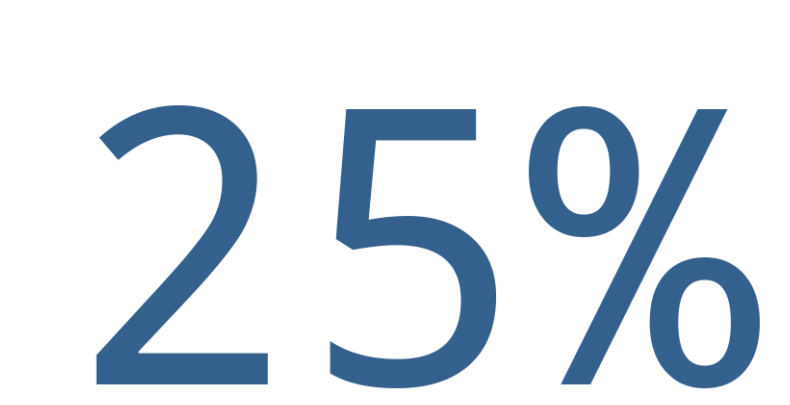

In [99]:
wordcloud = WordCloud(width = 800, height = 400, 
                      background_color = "white", 
                      #regexp = r'[\w%]+'
                     #).generate(wdc1)
                     ).generate_from_frequencies(wdc3)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [100]:
wdc4 = Counter(cli_tt)
print(wdc4)

Counter({'2018': 1})


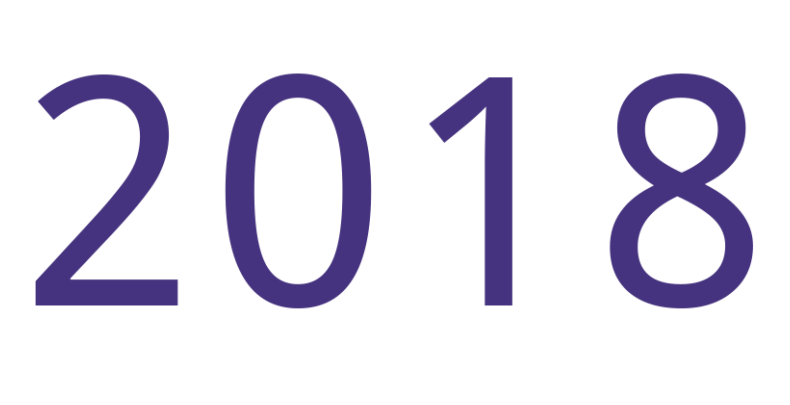

In [101]:
wordcloud = WordCloud(width = 800, height = 400, 
                      background_color = "white", 
                      #regexp = r'[\w%]+'
                     #).generate(wdc1)
                     ).generate_from_frequencies(wdc4)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

#### **Other**

In [50]:
p_oth = "|".join(t_nat + t_cli)
oth = condens[~condens["Target Name"].str.contains(p_oth, case = False, na = False)]

In [51]:
oth

,Target Name,dates,quants
0,BTR1 Target 3,,at least 7 billion m3
1,BTR1 Target 7,,2 million hectares


In [52]:
oth_qt = oth[oth['quants'] != ""]['quants'].str.split(';').explode('quants').reset_index(drop=True)
oth_tt = oth[oth['dates'] != ""]['dates'].str.split(';').explode('dates').reset_index(drop=True)

In [53]:
oth_qt

0    at least 7 billion m3
1       2 million hectares
Name: quants, dtype: object

In [54]:
oth_tt

Series([], Name: dates, dtype: object)

In [102]:
wdc5 = Counter(oth_qt)
print(wdc5)

Counter({'at least 7 billion m3': 1, '2 million hectares': 1})


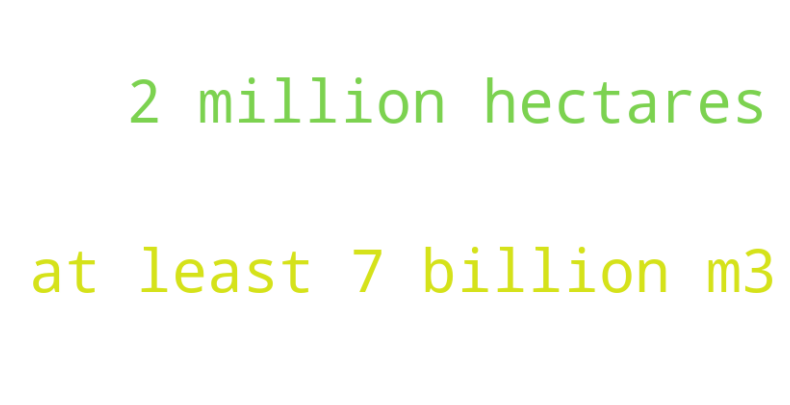

In [103]:
wordcloud = WordCloud(width = 800, height = 400, 
                      background_color = "white", 
                      #regexp = r'[\w%]+'
                     #).generate(wdc1)
                     ).generate_from_frequencies(wdc5)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [104]:
wdc6 = Counter(oth_tt)
print(wdc6)

Counter()


In [105]:
wordcloud = WordCloud(width = 800, height = 400, 
                      background_color = "white", 
                      #regexp = r'[\w%]+'
                     #).generate(wdc1)
                     ).generate_from_frequencies(wdc6)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

ValueError: We need at least 1 word to plot a word cloud, got 0.

### **Saving file**

In [29]:
dta.drop(["Country", "Target Text", "Document", "Source", "Convention", "Doc", "Type"], axis = 1, inplace = True)

In [30]:
final = pd.merge(dta, condens, how = "left")

In [31]:
final

,Target Name,dates,quants
0,CBD Target 1a,By 2030,
1,CBD Target 1b,By 2030,30%
2,CBD Target 2,By 2030,at least 30%
3,CBD Target 3,NaN,NaN
4,CBD Target 4,By 2030,at least 30 percent; 0 20%; 10%
5,CBD Target 5,NaN,NaN
6,CBD Target 6,by 2030,at least 50%
7,CBD Target 7,by 2030,
8,CBD Target 8,NaN,NaN
9,CBD Target 9,by 2030,


In [37]:
final = final.fillna("")

In [39]:
final.to_excel(path+"/"+cty+"_quantitative_"+datetime.today().strftime("%d%b%y").lstrip("0")+".xlsx", sheet_name = "Quantitative Terms", index=False)